In [66]:
import kagglehub
path = kagglehub.dataset_download("gpiosenka/sports-classification")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\pukac\.cache\kagglehub\datasets\gpiosenka\sports-classification\versions\9


In [67]:
import os
import random
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from torchvision import transforms

# EDA

In [68]:
train_path = os.path.join(path, "train")
valid_path = os.path.join(path, "valid")
test_path = os.path.join(path, "test")

classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
print("Class count: ", len(classes))
print("Classes: ", classes)

Class count:  100
Classes:  ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings

### Distribúcia tried

In [69]:
class_counts = {}

for cls in classes:
    folder = os.path.join(train_path, cls)
    class_counts[cls] = len(os.listdir(folder))

temp_df = pd.DataFrame(list(class_counts.items()), columns=["Trieda", "Pocet"])
temp_df.style.set_table_attributes('style="display:inline-block; height:300px; overflow:auto;"')



,Trieda,Pocet
0,air hockey,112
1,ampute football,112
2,archery,132
3,arm wrestling,99
4,axe throwing,113
5,balance beam,147
6,barell racing,123
7,baseball,174
8,basketball,169
9,baton twirling,108


In [70]:
def plot_cls_dist(classes, set):
    plt.figure(figsize=(25, 10))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xticks(rotation=90)
    plt.title(f"Distribúcia {set} setu obrázkov podľa tried")
    plt.xlabel("Trieda")
    plt.ylabel("Počet")
    plt.show()


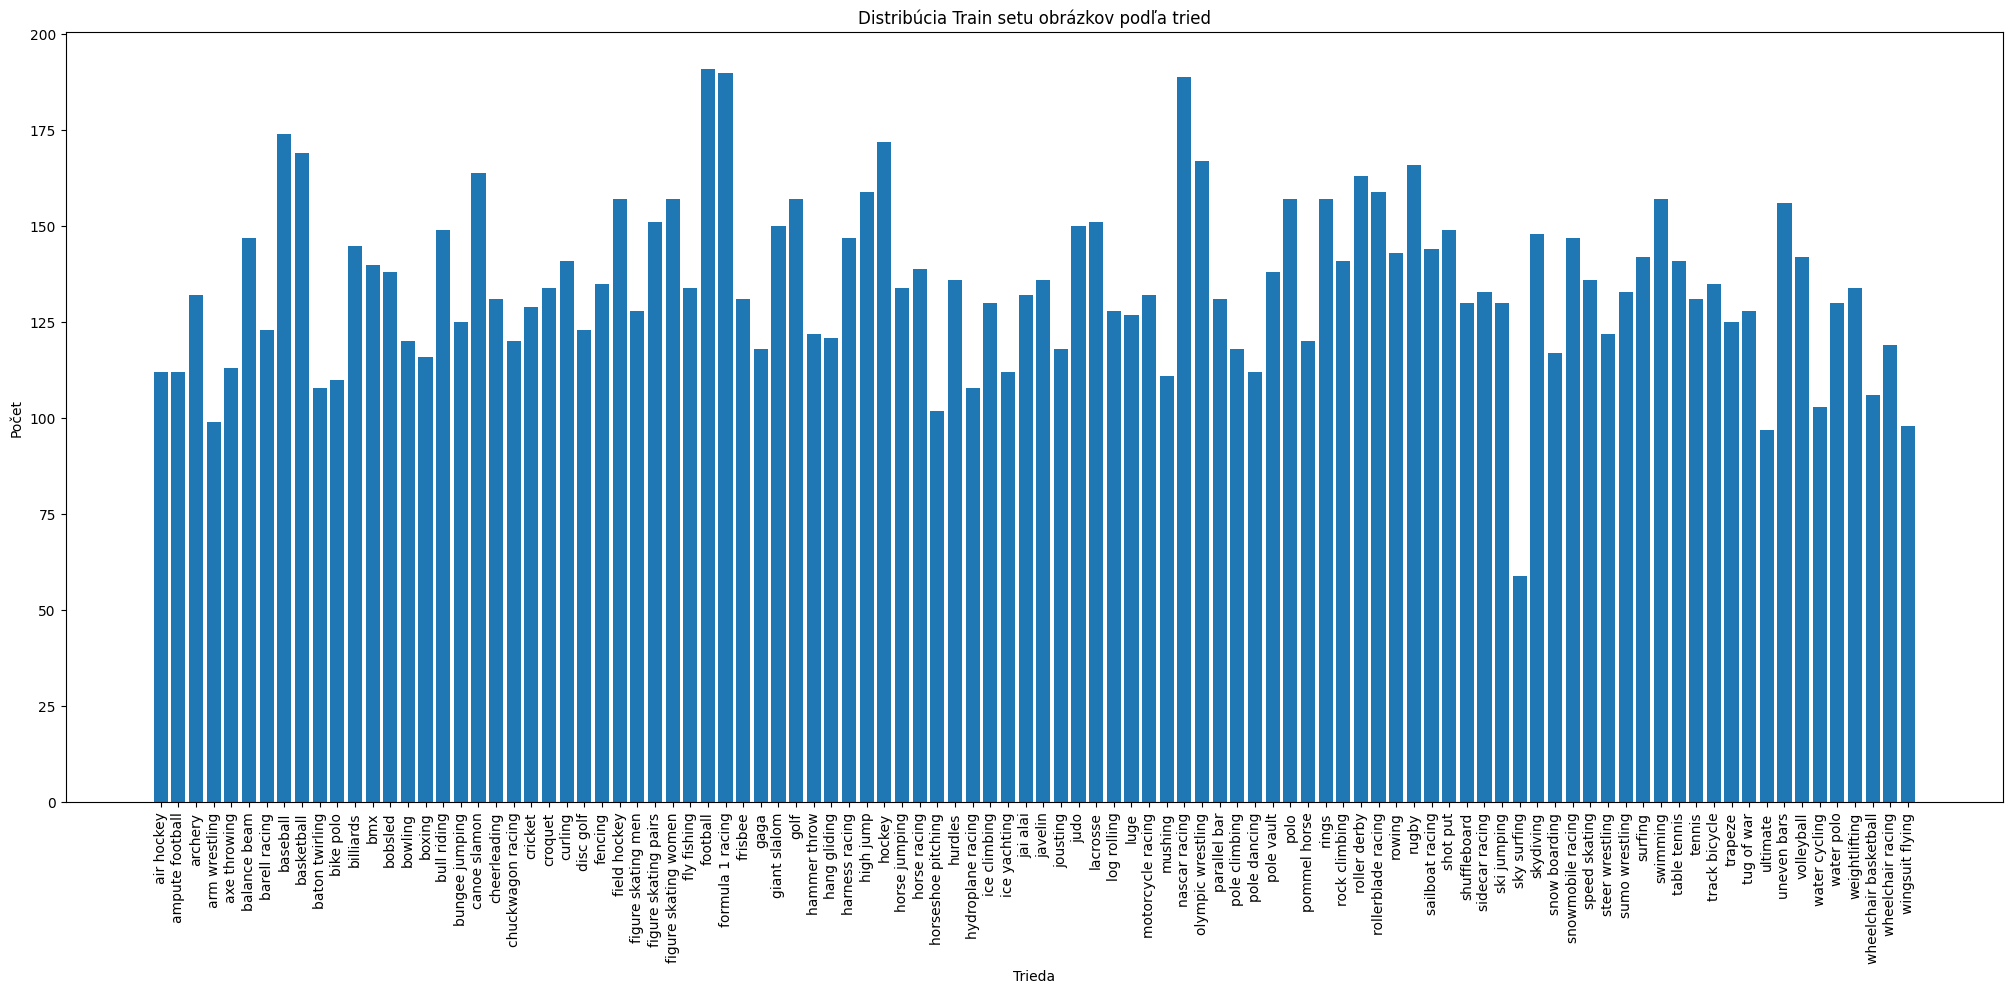

In [71]:
plot_cls_dist(class_counts, "Train")

### Príklady obrázkov z datasetu

In [72]:
def display_img(how_many, classes, path):
    for i in range(how_many):
        random_class = random.choice(classes)
        random_image = random.choice(os.listdir(os.path.join(path, random_class)))

        img_path = os.path.join(path, random_class, random_image)
        img = Image.open(img_path)

        plt.imshow(img)
        plt.title(f"Trieda: {random_class}")
        plt.axis("off")
        plt.show()

def display_img_grid(classes, path):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        cls = random.choice(classes)
        file = random.choice(os.listdir(os.path.join(path, cls)))
        img = Image.open(os.path.join(path, cls, file))

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

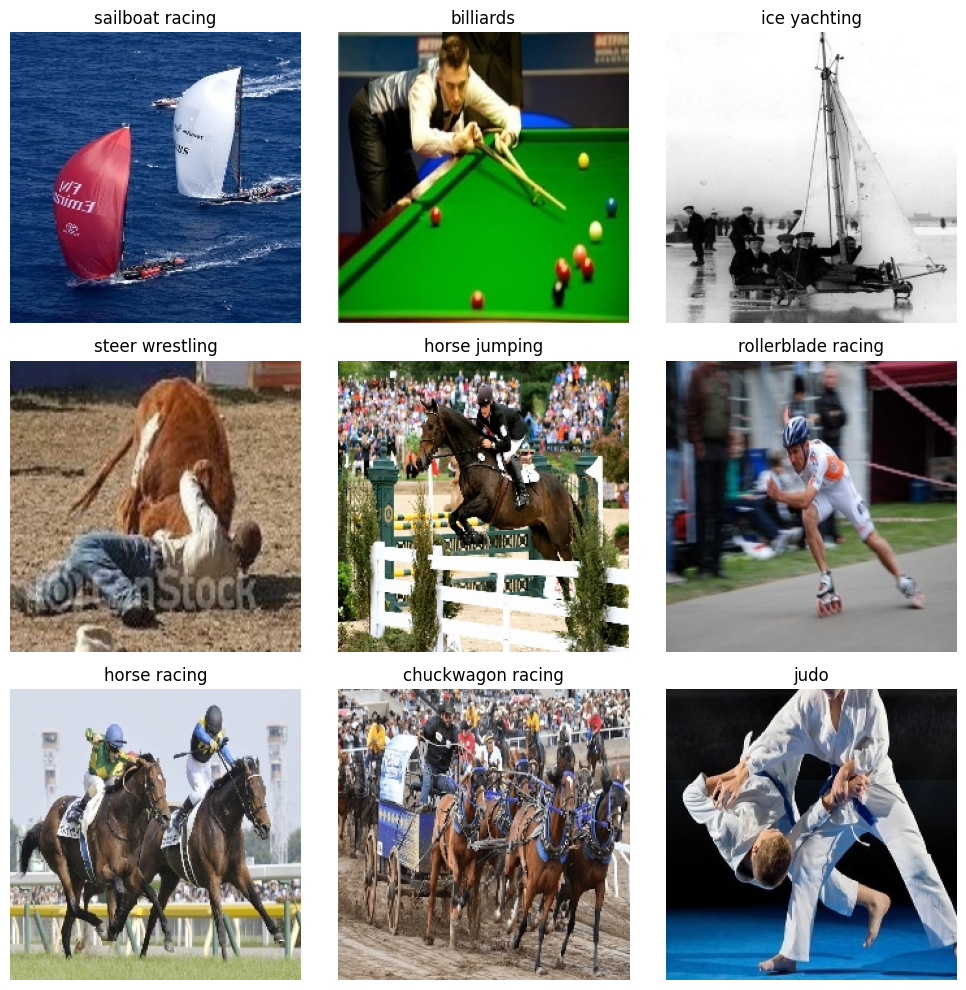

In [73]:
display_img_grid(classes, train_path)

### Veľkosti obrázkov

In [74]:
def analyze_size(classes, path):
    widths = []
    heights = []

    for cls in classes:
        folder = os.path.join(path, cls)
        
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            try:
                img = Image.open(img_path)
                w, h = img.size
                widths.append(w)
                heights.append(h)
            except:
                pass
    return widths, heights

def plot_sizes(widths, heights):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins = 30)
    plt.title("Widths")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30)
    plt.title("Heights")

    plt.show()

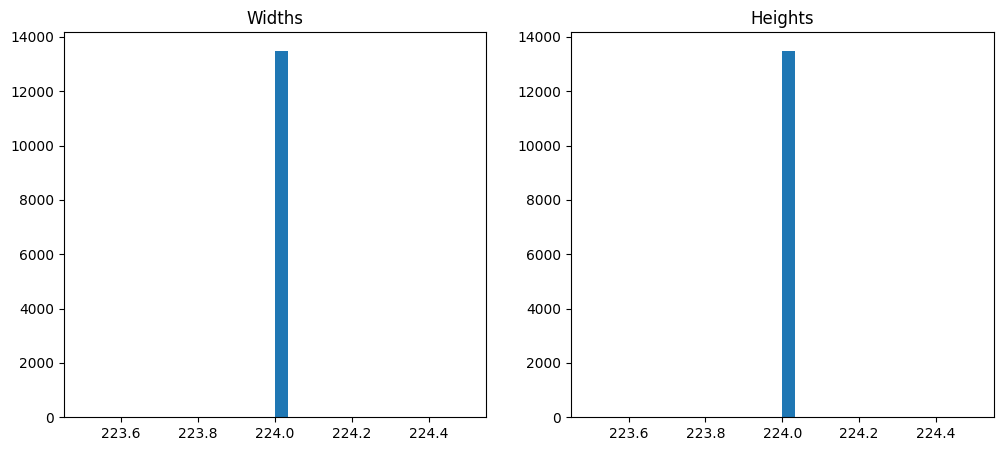

In [75]:
w, h = analyze_size(classes, train_path)
plot_sizes(w, h)

### Farebnosť

In [76]:
def analyze_colors(classes, path):
    color_modes = Counter()
    for cls in classes:
        folder = os.path.join(path, cls)

        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            try:
                img = Image.open(img_path)
                color_modes[img.mode] += 1
            except:
                pass
    print(color_modes)

In [77]:
analyze_colors(classes, train_path)

Counter({'RGB': 13483, 'L': 9})


In [78]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

preprocessing = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

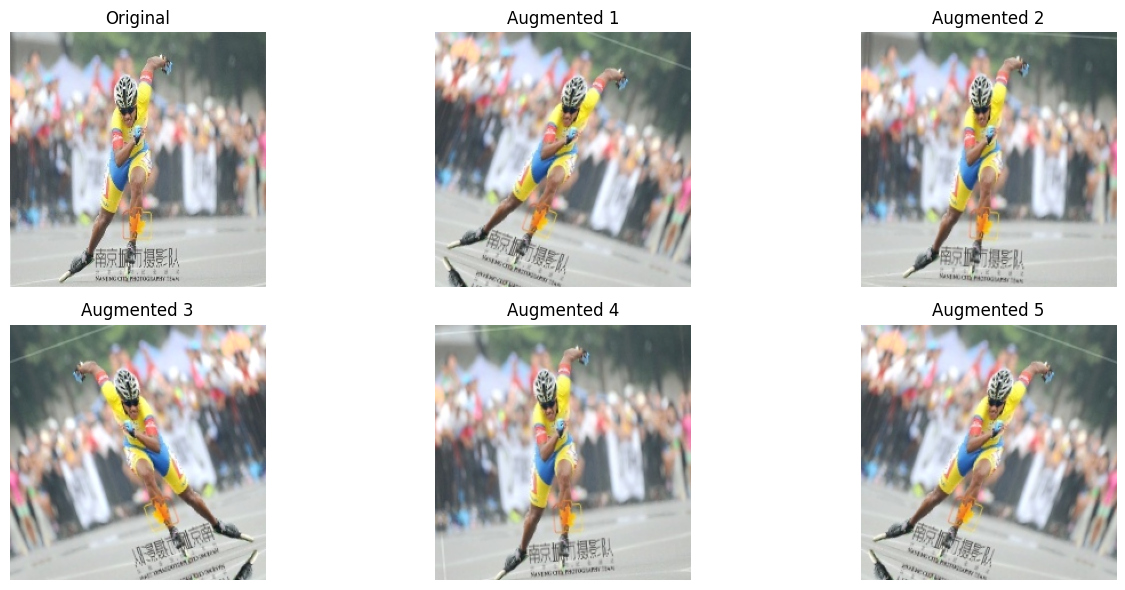

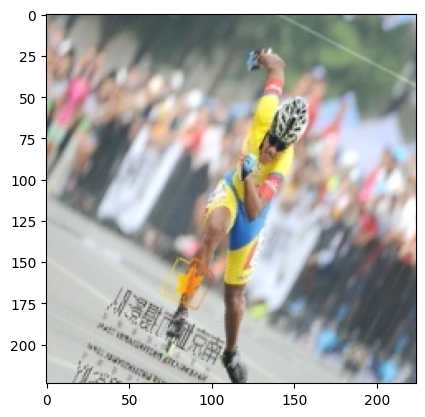

In [ ]:
train_path = os.path.join(path, "train")

classes = os.listdir(train_path)
cls = random.choice(classes)
img_file = random.choice(os.listdir(os.path.join(train_path, cls)))

img_path = os.path.join(train_path, cls, img_file)

img = Image.open(img_path).resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)

img_batch = tf.expand_dims(img_array, axis=0)

plt.figure(figsize=(14, 6))

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

for i in range(5):
    aug_img = data_augmentation(img_batch)[0].numpy().astype("uint8")
    plt.subplot(2, 3, i+2)
    plt.imshow(aug_img)
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()